## База данных

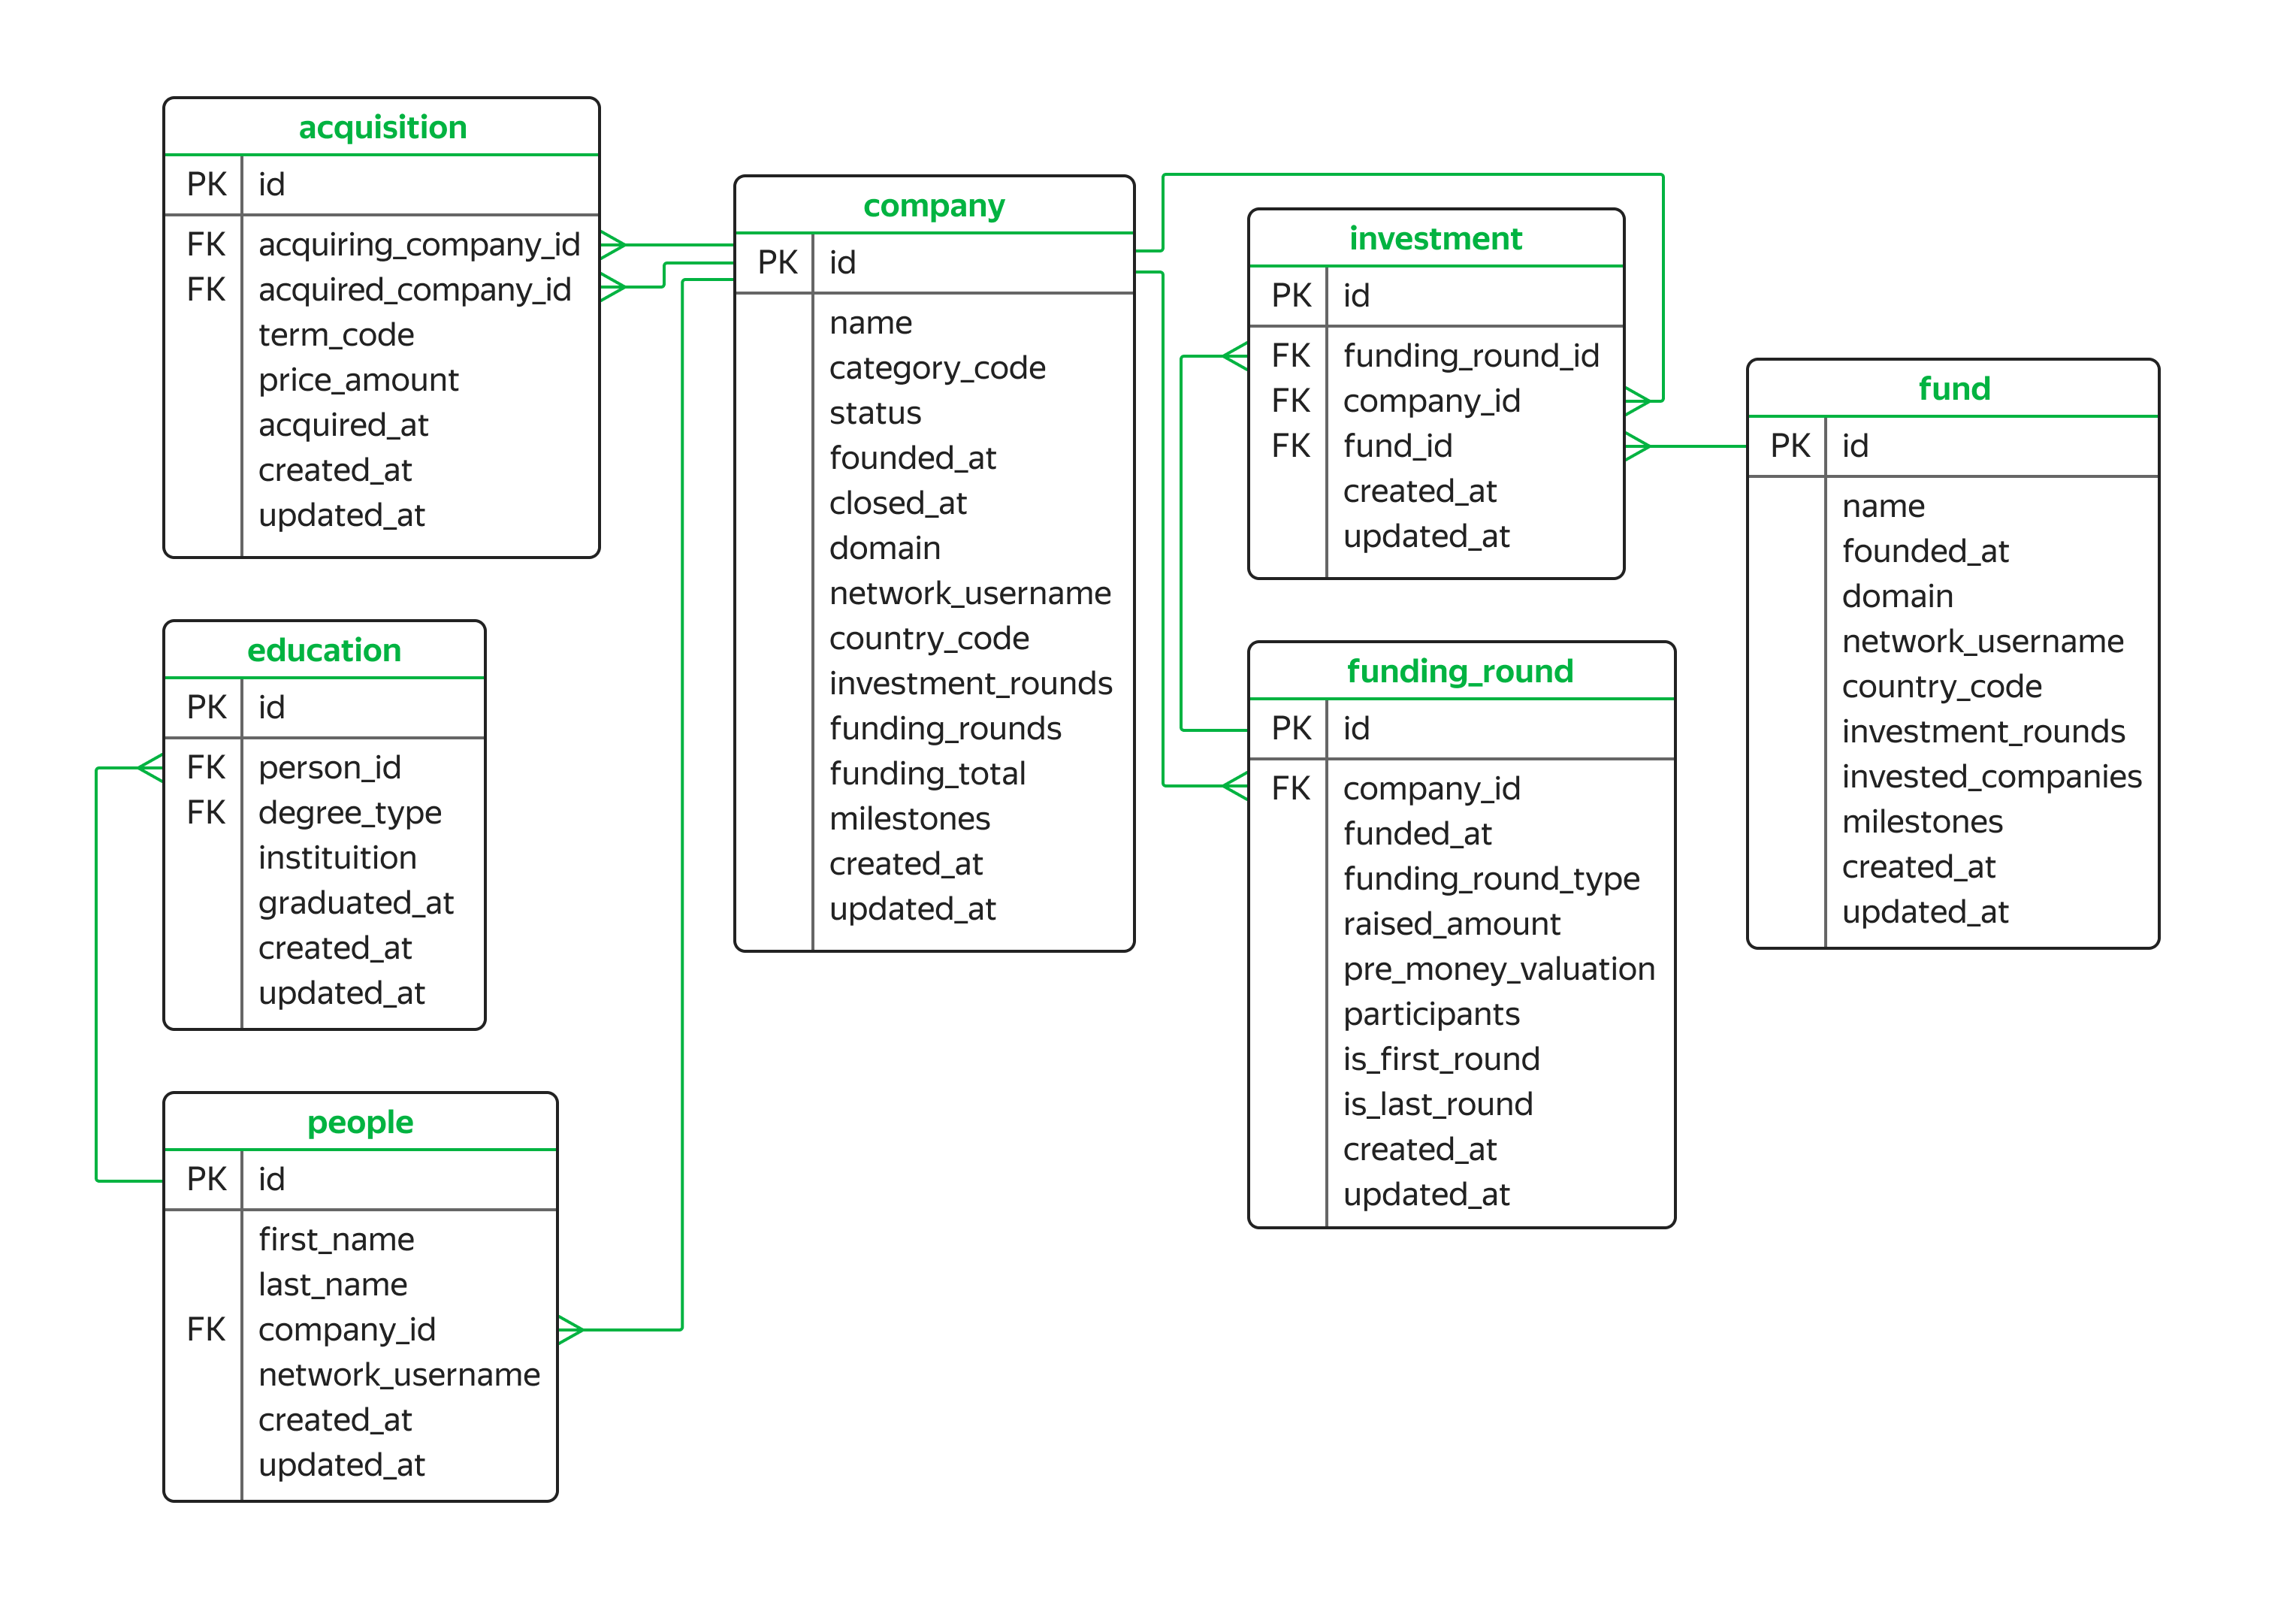

**Задания**


В самостоятельном проекте вам нужно проанализировать данные о фондах и инвестициях и написать запросы к базе. Задания будут постепенно усложняться, но всё необходимое для их выполнения: операторы, функции, методы работы с базой — вы уже изучили на курсе. К каждому заданию будет небольшая подсказка: она направит вас в нужную сторону, но подробного плана действий не предложит.


1.Отобразите все записи из таблицы company по компаниям, которые закрылись.

In [ ]:
SELECT *
FROM company
WHERE status = 'closed'

2.Отобразите количество привлечённых средств для новостных компаний США. Используйте данные из таблицы company. Отсортируйте таблицу по убыванию значений в поле `funding_total`.

In [ ]:
SELECT
      funding_total
FROM company
WHERE category_code = 'news'
      AND country_code = 'USA'
ORDER BY funding_total DESC

3.
Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

In [ ]:
SELECT SUM(price_amount)
FROM acquisition
WHERE term_code = 'cash'
      AND EXTRACT(YEAR FROM CAST(acquired_at AS date))  BETWEEN 2011 and 2013

4.Отобразите имя, фамилию и названия аккаунтов людей в поле network_username, у которых названия аккаунтов начинаются на 'Silver'.

In [ ]:
SELECT
      first_name,
      last_name,
      twitter_username
FROM people
WHERE twitter_username LIKE 'Silver%'

5.Выведите на экран всю информацию о людях, у которых названия аккаунтов в поле `network_username` содержат подстроку 'money', а фамилия начинается на 'K'.

In [ ]:
SELECT *
FROM people
WHERE twitter_username LIKE '%money%' AND last_name  LIKE 'K%'

6.Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.

In [ ]:
SELECT
      country_code,
      SUM(funding_total)
FROM company
GROUP BY country_code
ORDER BY SUM(funding_total) DESC

7.Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату.
Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

In [ ]:
SELECT funded_at,
    MIN(raised_amount),
    MAX(raised_amount)
FROM funding_round
GROUP BY funded_at
HAVING MIN(raised_amount) <> 0 AND MIN(raised_amount) <> MAX(raised_amount)

8.
Создайте поле с категориями:

  * Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию `high_activity`.
  * Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию `middle_activity`.
  * Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию `low_activity`.

Отобразите все поля таблицы fund и новое поле с категориями.

In [ ]:
SELECT *,
    CASE
        WHEN invested_companies >= 100 THEN 'high_activity'
        WHEN invested_companies >= 20 AND invested_companies < 100 THEN 'middle_activity'
        WHEN invested_companies < 20 THEN 'low_activity'
    END
FROM fund AS f

9.Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.

In [ ]:
SELECT
       CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity,
       Round(avg(investment_rounds)) as round
FROM fund
GROUP BY activity
ORDER BY round;

10.Проанализируйте, в каких странах находятся фонды, которые чаще всего инвестируют в стартапы.
Для каждой страны посчитайте минимальное, максимальное и среднее число компаний, в которые инвестировали фонды этой страны, основанные с 2010 по 2012 год включительно. Исключите страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю.
Выгрузите десять самых активных стран-инвесторов: отсортируйте таблицу по среднему количеству компаний от большего к меньшему. Затем добавьте сортировку по коду страны в лексикографическом порядке.

In [ ]:
SELECT
      f.country_code,
      MIN(f.invested_companies),
      MAX(f.invested_companies),
      AVG(f.invested_companies)
FROM fund f
WHERE EXTRACT(YEAR FROM f.founded_at) BETWEEN 2010 AND 2012
GROUP BY f.country_code
HAVING MIN(f.invested_companies) <> 0
ORDER BY AVG(f.invested_companies) DESC, f.country_code
LIMIT 10

11.Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.

In [ ]:
SELECT
    people.first_name,
    people.last_name,
    education.instituition
FROM people
LEFT JOIN education ON people.id = education.person_id

12.Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.

In [ ]:
SELECT
    company.name,
    COUNT(DISTINCT education.instituition)
FROM company
LEFT JOIN people ON company.id = people.company_id
JOIN education ON people.id = education.person_id
GROUP BY company.name
ORDER BY COUNT(DISTINCT education.instituition) DESC
LIMIT 5

13.Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.

In [ ]:
SELECT DISTINCT c.name
FROM company AS c
LEFT JOIN funding_round AS fr ON c.id=fr.company_id
WHERE status = 'closed'
  AND is_first_round = 1
  AND is_last_round = 1

14.Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

In [ ]:
SELECT DISTINCT p.id
FROM company AS c
INNER JOIN funding_round AS fr ON c.id=fr.company_id
INNER JOIN people AS p ON c.id=p.company_id
WHERE status = 'closed'
  AND is_first_round = 1
  AND is_last_round = 1

15.Составьте таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.

In [ ]:
SELECT
    DISTINCT p.id,
    ed.instituition
FROM company AS c
INNER JOIN funding_round AS fr ON c.id=fr.company_id
INNER JOIN people AS p ON c.id=p.company_id
INNER JOIN education AS ed ON p.id=ed.person_id
WHERE status = 'closed'
  AND is_first_round = 1
  AND is_last_round = 1

16.Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания. При подсчёте учитывайте, что некоторые сотрудники могли окончить одно и то же заведение дважды.

In [ ]:
SELECT
    DISTINCT p.id,
    COUNT(ed.instituition)
FROM company AS c
INNER JOIN people AS p ON c.id=p.company_id
LEFT JOIN education AS ed ON p.id=ed.person_id
WHERE status = 'closed'
      AND c.id IN (SELECT company_id
                   FROM funding_round
                   WHERE is_first_round = 1
                         AND is_last_round = 1
                  )
      AND ed.instituition IS NOT NULL
GROUP BY p.id

17.Дополните предыдущий запрос и выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.

In [ ]:
SELECT avg(dd.count_ed)
FROM (SELECT
           DISTINCT p.id,
           COUNT(ed.instituition) AS count_ed
      FROM company AS c
      INNER JOIN people AS p ON c.id=p.company_id
      LEFT JOIN education AS ed ON p.id=ed.person_id
      WHERE status = 'closed'
            AND c.id IN (SELECT company_id
                         FROM funding_round
                         WHERE is_first_round = 1
                         AND is_last_round = 1
                        )
      AND ed.instituition IS NOT NULL
GROUP BY p.id
    ) AS dd
LIMIT 1

18.Напишите похожий запрос: выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники Socialnet.

In [ ]:
SELECT AVG(dd.count_ed)
FROM (SELECT DISTINCT p.id,
      COUNT(ed.instituition) AS count_ed
      FROM company AS c
      INNER JOIN people AS p ON c.id=p.company_id
      LEFT JOIN education AS ed ON p.id=ed.person_id
      WHERE name = 'Facebook'
      AND ed.instituition IS NOT NULL
GROUP BY p.id) AS d

19.Составьте таблицу из полей:

  * `name_of_fund` — название фонда;
  * `name_of_company` — название компании;
  * `amount` — сумма инвестиций, которую привлекла компания в раунде.

В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.


In [ ]:
SELECT
    fund.name AS name_of_fund,
    company.name AS name_of_company,
    funding_round.raised_amount AS amount
FROM investment
JOIN company ON investment.company_id = company.id
JOIN fund ON fund.id = investment.fund_id
JOIN funding_round ON investment.funding_round_id = funding_round.id
WHERE company.milestones > 6
      AND EXTRACT(YEAR FROM funding_round.funded_at) BETWEEN 2012 AND 2013

20.
Выгрузите таблицу, в которой будут такие поля:

  * название компании-покупателя;
  * сумма сделки;
  * название компании, которую купили;
  * сумма инвестиций, вложенных в купленную компанию;
  * доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.

Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы.
Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в лексикографическом порядке. Ограничьте таблицу первыми десятью записями.

In [ ]:
WITH
com_acquiring AS (SELECT acquisition.id, c.name, acquisition.price_amount
                  FROM acquisition
                  JOIN company AS c ON acquisition.acquiring_company_id = c.id
                  AND acquisition.price_amount != 0 ),
com_acquired AS (SELECT acquisition.id, c.name, c.funding_total
                 FROM acquisition
                 JOIN company AS c ON acquisition.acquired_company_id = c.id
                 AND c.funding_total != 0)

SELECT com_acquiring.name,
    com_acquiring.price_amount,
    com_acquired.name as buyed,
    com_acquired.funding_total,
    ROUND(com_acquiring.price_amount / com_acquired.funding_total) AS partit
FROM com_acquiring
JOIN com_acquired ON com_acquiring.id = com_acquired.id
ORDER BY com_acquiring.price_amount DESC,
    buyed
LIMIT 10

21.Выгрузите таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год включительно. Проверьте, что сумма инвестиций не равна нулю. Выведите также номер месяца, в котором проходил раунд финансирования.

In [ ]:
SELECT c.name,
    EXTRACT(MONTH FROM fr.funded_at)
FROM company AS c
LEFT JOIN funding_round AS fr ON c.id = fr.company_id
WHERE c.category_code = 'social'
    AND EXTRACT(YEAR FROM fr.funded_at) BETWEEN 2010 AND 2013
    AND fr.raised_amount > 0;

22.Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:

  * номер месяца, в котором проходили раунды;
  * количество уникальных названий фондов из США, которые инвестировали в этом месяце;
  * количество компаний, купленных за этот месяц;
  * общая сумма сделок по покупкам в этом месяце.

In [ ]:
WITH
fundings AS (
   SELECT EXTRACT(MONTH FROM fr.funded_at) AS funding_month,
          COUNT(DISTINCT f.id) AS us_funds
   FROM fund AS f
   LEFT JOIN investment AS i ON f.id = i.fund_id
   LEFT JOIN funding_round AS fr ON i.funding_round_id = fr.id
   WHERE f.country_code = 'USA'
       AND EXTRACT(YEAR FROM fr.funded_at) BETWEEN 2010 AND 2013
   GROUP BY funding_month),
acquisitions AS (
   SELECT EXTRACT(MONTH FROM acquired_at)AS funding_month,
          COUNT(acquired_company_id) AS bought_co,
          SUM(price_amount) AS sum_total
   FROM acquisition
   WHERE EXTRACT(YEAR FROM acquired_at) BETWEEN 2010 AND 2013
   GROUP BY funding_month)

SELECT fnd.funding_month,
       fnd.us_funds,
       acq.bought_co,
       acq.sum_total
FROM fundings AS fnd
LEFT JOIN acquisitions AS acq ON fnd.funding_month = acq.funding_month;

23.Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [ ]:
WITH
inv_2011 AS
  (SELECT country_code AS country,
          AVG(funding_total) AS inv_sum1
   FROM company
   WHERE EXTRACT(YEAR FROM founded_at) BETWEEN 2011 AND 2013
   GROUP BY country,
       EXTRACT(YEAR FROM founded_at)
   HAVING EXTRACT(YEAR FROM founded_at) = '2011'),
inv_2012 AS
  (SELECT country_code AS country,
          AVG(funding_total) AS inv_sum2
   FROM company
   WHERE EXTRACT(YEAR FROM founded_at) BETWEEN 2011 AND 2013
   GROUP BY country,
       EXTRACT(YEAR FROM founded_at)
   HAVING EXTRACT(YEAR FROM founded_at) = '2012'),
inv_2013 AS
  (SELECT country_code AS country,
          AVG(funding_total) AS inv_sum3
   FROM company
   WHERE EXTRACT(YEAR FROM founded_at) BETWEEN 2011 AND 2013
   GROUP BY country,
       EXTRACT(YEAR FROM founded_at)
   HAVING EXTRACT(YEAR FROM founded_at) = '2013')


SELECT inv_2011.country,
       inv_2011.inv_sum1,
       inv_2012.inv_sum2,
       inv_2013.inv_sum3
FROM inv_2011
JOIN inv_2012 ON inv_2011.country = inv_2012.country
JOIN inv_2013 ON inv_2012.country = inv_2013.country
ORDER BY inv_2011.inv_sum1 DESC;